In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import configuration as config

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = config.consumer_key
consumer_secret = config.consumer_secret
access_token = config.access_token
access_token_secret = config.access_token_secret

now = datetime.datetime.now()
rpt_DT = now.strftime("%Y-%m-%d")
print ("Current date and time using strftime:")
print (rpt_DT)

Current date and time using strftime:
2018-03-28


In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
listen_user = "@JahnaviParab"
analysed = []
analyse_user = []
author= []
last_analysed = 979038569254748161
to_analyse_count = 0

tweets_DF = pd.DataFrame()

tweets_DF['tweet#'] = ""
tweets_DF['user'] = ""
tweets_DF['tweet'] = ""
tweets_DF['compound'] = ""
tweets_DF['positive'] = ""
tweets_DF['negative'] = ""
tweets_DF['neutral'] = ""

tweet_analysis = pd.DataFrame()


# Array to hold sentiment
sentiment_array = []



In [5]:
def tweet_plot(user,auth):
    file_name = user+'.png'
    msg = 'New Tweet Analysis: @' + user +  'Thankyou!! @' + auth
    #api.update_with_media(file_name,msg)
    return;



In [6]:
def plot_analyze (tweets_DF,user):
#create plots
    user_plot = plt.plot(tweets_DF['tweet#'], tweets_DF['compound'],marker="o",c='blue',alpha=0.5,linewidth=1)
    #set plot features
    plt.axis([-500, 0, -1, 1])
    plt.grid(linestyle='-', linewidth=0.5)
    plt.xlabel("Tweets Ago")
    plt.ylabel("Tweet Polarity")
    plt.title("Sentiment Analysis of \'@" + user + "\' Tweets (" + rpt_DT + ")")
    plt.legend(user_plot,[user], bbox_to_anchor=(1.3, 0.9))
    #plt.legend()
    file_name = user+'.png'
    plt.savefig(file_name)
    plt.show()
    return;

In [7]:
def user_analyze(user):
    counter = 0
    tweet_counter = 0
    for x in range(25):
        user_public_tweets = api.user_timeline(user,page=x)
        for tweet in user_public_tweets:
            tweets_DF.set_value(counter, 'tweet#', tweet_counter)
            tweets_DF.set_value(counter, 'user', user)
            tweets_DF.set_value(counter, 'tweet', tweet["text"])
            tweet_analysis = analyzer.polarity_scores(tweet["text"])
            tweets_DF.set_value(counter,'compound',float(tweet_analysis["compound"]))
            tweets_DF.set_value(counter,'positive',float(tweet_analysis["pos"]))
            tweets_DF.set_value(counter,'negative',float(tweet_analysis["neg"]))
            tweets_DF.set_value(counter,'neutral',float(tweet_analysis["neu"]))
            counter = counter + 1
            tweet_counter = tweet_counter - 1
    tweets_DF.head(5)
    plot_analyze(tweets_DF,user)
    return;

Last analysed : 979038569254748161
 
Did not request for analysis in tweet : "@JahnaviParab @Raghavanmurari"
 
Did not request for analysis in tweet : "RT @JahnaviParab: New Tweet Analysis: @RaghavanmurariThankyou!! @rahulmparab https://t.co/pBSrd8AMt0"
Analyzing tweet : @JahnaviParab Analyze: @Raghavanmurari sps : 979186571361501184
 
Did not request for analysis in tweet : "RT @JahnaviParab: New Tweet Analysis: @stevesmith49Thankyou!! @rahulmparab https://t.co/PqHP78SBOx"
 
Did not request for analysis in tweet : "@JahnaviParab This is awesome !!! Great work"
Analyzing tweet : @JahnaviParab Analyze: @stevesmith49 : 979183469916860416
Analyzing tweet : @JahnaviParab Analyze: @SadiqKhan : 979181088974168065
 
Did not request for analysis in tweet : "New Tweet Analysis: @PayPalThankyou!! @JahnaviParab https://t.co/mEI52cfVKy"
 
Did not request for analysis in tweet : "New Tweet Analysis: @iamsrkThankyou!! @JahnaviParab https://t.co/DwsL8n1KE7"
 
Did not request for analysis in tweet : "

/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: set_value is 

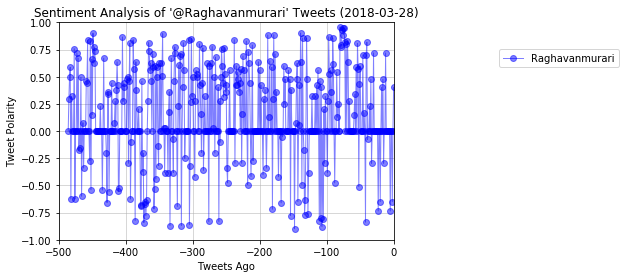

1
Analyzing user : stevesmith49


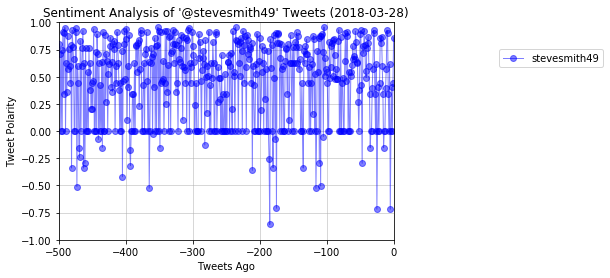

2
Analyzing user : SadiqKhan


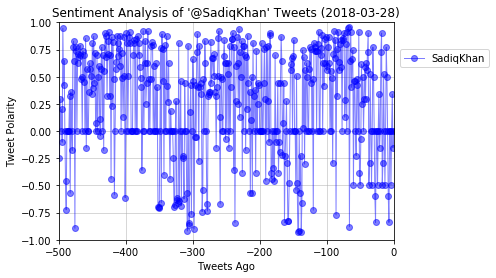

3
Analyzing user : SrBachchan


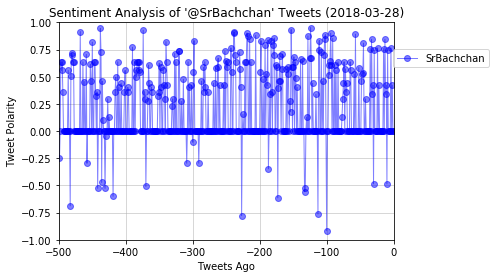

4
Analyzing user : iamsrk


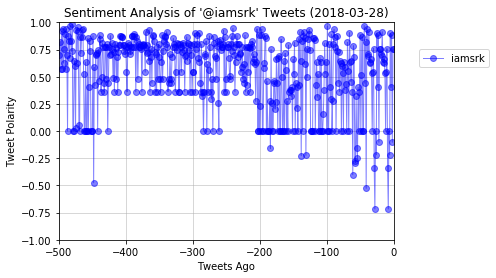

5
Analyzing user : PayPal


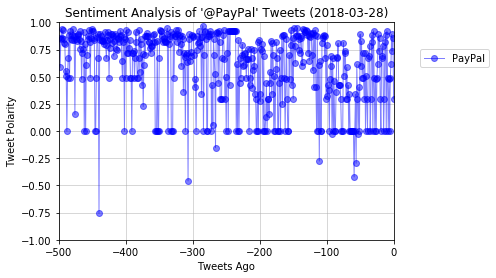

KeyboardInterrupt: 

In [8]:
while(True):
    public_tweets = api.search(listen_user, since_id=last_analysed,count=30)
    print('Last analysed : ' + str(last_analysed)) 
    analyse_user = []
    author= []
    if(len(public_tweets["statuses"]) > 0):
        for tweet in public_tweets["statuses"]:
            if('Analyze:' in tweet["text"]):
                to_analyse_count = len(tweet["entities"]["user_mentions"])
                print('Analyzing tweet : ' + tweet["text"]+" : "+ str(tweet["id"]))
                if last_analysed < tweet["id"]:
                    last_analysed = tweet["id"]
                i=1
                while (i < to_analyse_count):
                    user_toAnalyze  = tweet["entities"]["user_mentions"][i]["screen_name"]
                    author.append(tweet["user"]["screen_name"])
                    analyse_user.append(user_toAnalyze)
            #analysing_user.set_value(j,'author',tweet["user"]["screen_name"])
            #analysing_user.set_value(j,'analyse_user',user_toAnalyze)
                    i=i+1
            else:
                print(" ")
                print('Did not request for analysis in tweet : \"' + tweet["text"] + '\"')
            

    
        i = 0
        while i < len(analyse_user):
            print(i)
            if analyse_user[i] in analysed:
                print("Already analysed")
                i = i+1
            else:
                user = analyse_user[i]
                auth = author[i]
                print("Analyzing user : " + user)
                user_analyze(user)
                analysed.append(analyse_user[i])
                #tweet_plot(user,auth)
                i = i+1
    else:
        print('No new tweets!!!')
            
            
    time.sleep(60 * 5)
    
